# Regresión iterativa y con regularización
### Alicia Brown

In [1]:
# Importacion de librerías y paquetes
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Lectura de datos
data = pd.read_csv("https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin.csv")
data.describe()

,X,y
count,1029.000000,1029.000000
mean,50.008111,32.893917
std,29.055066,18.083566
min,0.030369,-4.586608
25%,25.201087,17.583093
50%,50.884987,33.564129
75%,75.636823,48.339811
max,99.959580,71.762748


In [3]:
#Creación de muestra entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(data[['X']], data[['y']], train_size=0.75)
X_train, X_test, Y_train, Y_test = np.array(X_train), np.array(X_test), np.array(Y_train), np.array(Y_test)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
#Estandarización de los datos
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [5]:
# Agregar columna de 1's para W0 (intercepto)
X = np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1)
w = np.ones((1,len(X[0])))
eta = 0.1
lam = 0

In [6]:
# Regresión lineal iterativa con eta = 0.1 y lambda = 0 (para que sea sin regularización)
def RegLinIter(X, y, w, eta, lam):
    for i in range(len(X)):
        v_i=np.dot(w,X[i])
        error_i = eta*(y[i]-v_i)
        for j in range(len(w)+1):
            w[0][j] += error_i*X[i][j] - lam*np.mean(X[i])
    return w

In [9]:
w = RegLinIter(X, Y_train,w,eta,lam)
w

array([[ 32.53611925,  18.45763264]])

In [11]:
# Comparación con regresión de minimos cuadrados
regr = linear_model.LinearRegression()
linreg = regr.fit(X_train, Y_train)
b0, b1 = linreg.intercept_, linreg.coef_
print b0, b1

[ 33.34540774] [[ 17.4657084]]


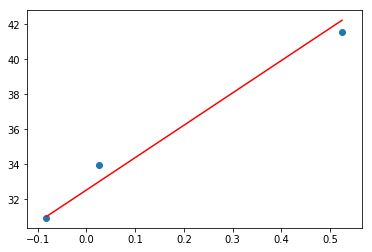

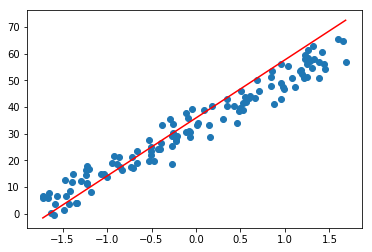

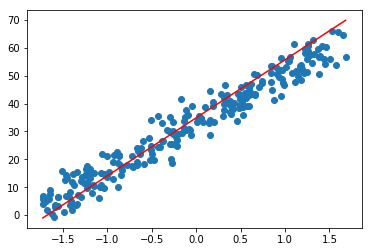

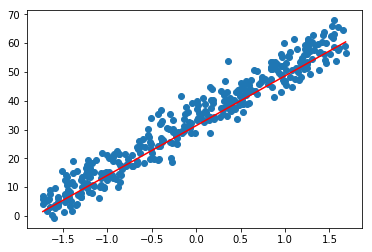

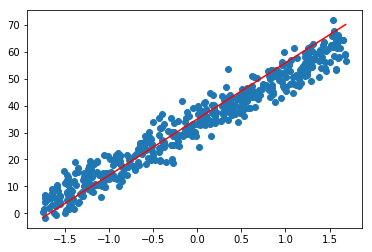

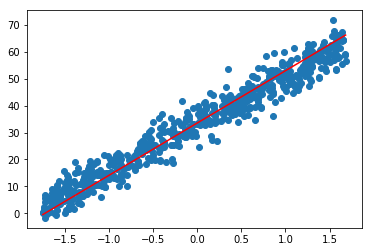

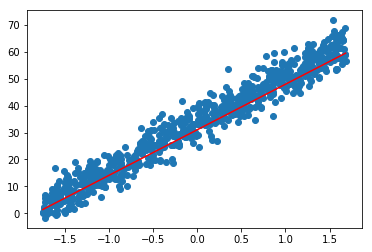

In [8]:
# Grafica de evolución de ajuste cada 120 datos
for i in range(len(X)):
    V = np.dot(w, X[i])
    error = Y_train-V
    for j in range (len(w)):
        w[j] += eta * (error[i]) * X[i][j]
    if i % 120 == 2:
        plt.scatter(X_train[:i+1], Y_train[:i+1])
        x0 = np.amin(X_train[:i+1])
        x1 = np.amax(X_train[:i+1])
        b = w[0][0]
        m = w[0][1]
        y0 = m*x0 + b
        y1 = m*x1 + b
        plt.plot([x0, x1], [y0, y1], c='r')    
        plt.show()